In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: line 1: google-drive-ocamlfuse: command not found


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

FUNCTIONS

In [4]:
def show_results(classifierName):
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(" ")

  cm = confusion_matrix(y_test, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classifierName.classes_)
  disp.plot()

  plt.show()

DATASET

In [5]:
data = pd.read_csv('drive/MyDrive/TEZ/autism-code/DuyguDurumları_veriseti/1_MutluDataSET.csv')
# To display the top 5 rows
data.head(5)

,Participant,M Y1,M Y2,M Y3,M Y4,M Y5,M Y6,M Y7,M Y8,M Y9,...,X_B4,X_B5,X_B6,X_B7,X_B8,X_B9,X_B10,X_B11,X_B12,Class
0,ahi,2784.15,2516.10,2770.45,3018.25,161.90,5.0,8.0,15.45,14.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,OSB
1,aden1,2955.70,4281.70,4405.70,4614.05,762.15,4.0,5.5,16.40,23.80,...,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,NG
2,bulem dogan ng 18,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,1711.80,1076.00,2.0,2.0,7.95,8.1,1459.90,8.1,729.90,OSB
3,aras22,2190.15,2323.85,2443.90,2541.80,200.00,2.5,3.0,12.20,12.90,...,56.00,0.00,0.0,0.0,0.90,0.0,0.00,0.0,0.00,NG
4,meric arda,7961.75,8119.70,8433.75,8691.80,1452.10,6.0,8.5,44.25,45.05,...,140.05,72.05,0.5,0.5,0.60,0.4,72.05,0.4,72.05,NG


In [6]:
data = data.drop(['Participant'], axis=1)
data

,M Y1,M Y2,M Y3,M Y4,M Y5,M Y6,M Y7,M Y8,M Y9,M Y10,...,X_B4,X_B5,X_B6,X_B7,X_B8,X_B9,X_B10,X_B11,X_B12,Class
0,2784.15,2516.10,2770.45,3018.25,161.90,5.0,8.0,15.45,14.00,2474.10,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,OSB
1,2955.70,4281.70,4405.70,4614.05,762.15,4.0,5.5,16.40,23.80,4223.65,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,NG
2,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,1711.80,1076.00,2.0,2.0,7.95,8.10,1459.90,8.10,729.90,OSB
3,2190.15,2323.85,2443.90,2541.80,200.00,2.5,3.0,12.20,12.90,2323.85,...,56.00,0.00,0.0,0.0,0.90,0.00,0.00,0.00,0.00,NG
4,7961.75,8119.70,8433.75,8691.80,1452.10,6.0,8.5,44.25,45.05,8095.70,...,140.05,72.05,0.5,0.5,0.60,0.40,72.05,0.40,72.05,NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,5352.80,5221.15,5487.05,5802.85,1525.90,5.5,5.5,29.75,29.00,5221.15,...,438.20,438.20,0.5,0.5,2.00,2.45,438.20,2.45,438.20,NG
120,6411.55,6833.65,7265.60,7597.80,913.60,8.0,8.5,35.65,38.00,6787.75,...,635.50,480.00,1.0,1.0,3.20,2.65,480.00,2.65,480.00,NG
121,4063.95,3720.85,4206.75,4524.70,481.00,11.0,17.0,22.60,20.65,3559.50,...,356.30,117.90,1.0,2.0,1.75,1.55,251.95,1.40,145.25,NG
122,7437.40,7481.50,7923.60,8313.50,1138.00,7.0,8.0,41.35,41.60,7439.50,...,677.90,175.90,1.0,2.0,3.50,3.10,520.00,2.90,260.00,NG


In [7]:
target = 'Class'
features_list = list(data.columns)
features_list.remove(target)

In [8]:
y = data.pop('Class')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=33)

In [10]:
print("Training records: {}".format(X_train.shape[0]))
print("Testing records: {}".format(X_test.shape[0]))

Training records: 99
Testing records: 25


In [11]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

DECISION TREE

In [12]:
classifierDT = tree.DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = classifierDT.predict(X_test)

Accuracy: 56.00%
 


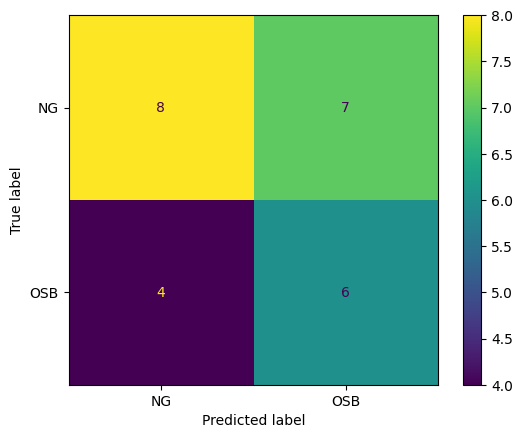

In [14]:
show_results(classifierDT)

NAIVE BAYES

In [15]:
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = classifierNB.predict(X_test)

Accuracy: 56.00%
 


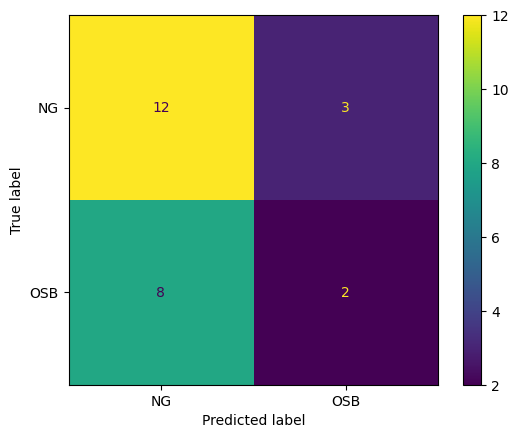

In [17]:
show_results(classifierNB)

KNN

In [18]:
classifierKNN = KNeighborsClassifier(n_neighbors=3)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = classifierKNN.predict(X_test)

Accuracy: 48.00%
 


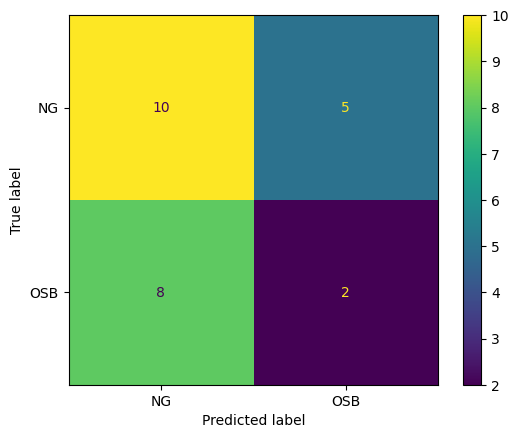

In [20]:
show_results(classifierKNN)